In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d andrewmvd/road-sign-detection

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/road-sign-detection
License(s): CC0-1.0
 88% 193M/218M [00:01<00:00, 216MB/s]
100% 218M/218M [00:01<00:00, 211MB/s]


In [ ]:
!unzip /content/road-sign-detection.zip

Archive:  /content/road-sign-detection.zip
  inflating: annotations/road0.xml   
  inflating: annotations/road1.xml   
  inflating: annotations/road10.xml  
  inflating: annotations/road100.xml  
  inflating: annotations/road101.xml  
  inflating: annotations/road102.xml  
  inflating: annotations/road103.xml  
  inflating: annotations/road104.xml  
  inflating: annotations/road105.xml  
  inflating: annotations/road106.xml  
  inflating: annotations/road107.xml  
  inflating: annotations/road108.xml  
  inflating: annotations/road109.xml  
  inflating: annotations/road11.xml  
  inflating: annotations/road110.xml  
  inflating: annotations/road111.xml  
  inflating: annotations/road112.xml  
  inflating: annotations/road113.xml  
  inflating: annotations/road114.xml  
  inflating: annotations/road115.xml  
  inflating: annotations/road116.xml  
  inflating: annotations/road117.xml  
  inflating: annotations/road118.xml  
  inflating: annotations/road119.xml  
  inflating: annotations/

In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16575, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 16575 (delta 28), reused 37 (delta 18), pack-reused 16522
Receiving objects: 100% (16575/16575), 15.10 MiB | 25.90 MiB/s, done.
Resolving deltas: 100% (11385/11385), done.


In [ ]:
cd yolov5

/content/yolov5


In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.0/755.0 kB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_

In [ ]:
import xml.etree.ElementTree as ET
import os
from tqdm import tqdm
import pandas as pd

In [ ]:
input_path = '/content/'
output_path = '/content/yolov5'


In [ ]:
annotations_path = os.path.join(input_path, 'annotations')
annotations = os.listdir(annotations_path)

In [ ]:
img_name_list = []
width_list = []
height_list = []
label_list = []
xmin_list = []
ymin_list = []
xmax_list = []
ymax_list = []

for idx in tqdm(range(len(annotations))):

    tree = ET.parse(os.path.join(annotations_path, annotations[idx]))
    root = tree.getroot()

    img_name = root.find('filename').text

    size = root.find('size')
    width = size.find('width').text
    height = size.find('height').text

    for group in root.findall('object'):
        label = group.find('name').text
        bbox = group.find('bndbox')
        xmin = bbox.find('xmin').text
        ymin = bbox.find('ymin').text
        xmax = bbox.find('xmax').text
        ymax = bbox.find('ymax').text

        img_name_list.append(img_name)
        width_list.append(width)
        height_list.append(height)
        xmin_list.append(xmin)
        ymin_list.append(ymin)
        xmax_list.append(xmax)
        ymax_list.append(ymax)
        label_list.append(label)

100%|██████████| 877/877 [00:00<00:00, 19389.21it/s]


In [ ]:
labels_df = pd.DataFrame({
                        'img_name': img_name_list,
                        'width': width_list,
                        'height': height_list,
                        'xmin': xmin_list,
                        'ymin': ymin_list,
                        'xmax': xmax_list,
                        'ymax': ymax_list,
                        'label': label_list})
labels_df.head()

,img_name,width,height,xmin,ymin,xmax,ymax,label
0,road285.png,300,400,120,135,155,171,speedlimit
1,road285.png,300,400,40,310,52,322,speedlimit
2,road285.png,300,400,35,322,43,338,trafficlight
3,road476.png,300,400,68,165,128,224,speedlimit
4,road366.png,300,400,77,100,136,156,speedlimit


In [ ]:
labels_df.shape

(1244, 8)

In [ ]:
!pip install pybboxes

In [ ]:
import numpy as np
import pandas as pd
import os
import pybboxes as pbx
from collections import defaultdict
from tqdm import tqdm
import shutil

In [ ]:
classes = labels_df['label'].unique().tolist()
classes

['speedlimit', 'trafficlight', 'crosswalk', 'stop']

In [ ]:
## Add class number associated to classes
labels_df['class'] = labels_df['label'].apply(lambda x: classes.index(x))
labels_df.head()

,img_name,width,height,xmin,ymin,xmax,ymax,label,class
0,road285.png,300,400,120,135,155,171,speedlimit,0
1,road285.png,300,400,40,310,52,322,speedlimit,0
2,road285.png,300,400,35,322,43,338,trafficlight,1
3,road476.png,300,400,68,165,128,224,speedlimit,0
4,road366.png,300,400,77,100,136,156,speedlimit,0


In [ ]:
## Generate dictionary where key is image_name and value is list of all bboxes inforamtion
img_dict = defaultdict(list)

for idx in tqdm(range(len(labels_df))):
    sample_label_list = []
    img_name = labels_df.loc[idx, 'img_name']
    xmin = labels_df.loc[idx, 'xmin']
    ymin = labels_df.loc[idx, 'ymin']
    xmax = labels_df.loc[idx, 'xmax']
    ymax = labels_df.loc[idx, 'ymax']
    class_num = labels_df.loc[idx, 'class']
    W, H = int(labels_df.loc[idx, 'width']), int(labels_df.loc[idx, 'height'])

    voc_bbox = (int(xmin), int(ymin) ,int(xmax), int(ymax))

    x_center, y_center, w, h = pbx.convert_bbox(voc_bbox, from_type="voc", to_type="yolo", image_size=(W,H))

    sample_label_list.append(str(class_num))
    sample_label_list.append(str(x_center))
    sample_label_list.append(str(y_center))
    sample_label_list.append(str(w))
    sample_label_list.append(str(h))
    line = ' '.join(sample_label_list)

    img_dict[img_name].append(line)

100%|██████████| 1244/1244 [00:00<00:00, 6878.73it/s]


In [ ]:
# make labels dir in data folder of yolov5
labels_dir = f'{output_path}/data/labels'
if os.path.exists(labels_dir):
    shutil.rmtree(labels_dir)
os.mkdir(labels_dir)

In [ ]:
## Generate .txt file for each image
for img_name, lines in img_dict.items():
    img_name = img_name.split('.')[0]
    with open(f'{labels_dir}/{img_name}.txt', 'w') as f:
        for line in lines:
            f.write(line)
            f.write('\n')

In [ ]:
import os
import shutil
from random import shuffle

In [ ]:
images_path = input_path + '/images'
labels_path = labels_dir   ## directory having labels in .txt format

In [ ]:
# create train , val folders in data directory of yolov5
train_dir = output_path + '/data/train'
val_dir = output_path + '/data/val'

if os.path.exists(train_dir):
    shutil.rmtree(train_dir)

if os.path.exists(val_dir):
    shutil.rmtree(val_dir)

os.mkdir(train_dir)
os.mkdir(val_dir)

# train, val each containing images and labels folders
os.mkdir(train_dir + '/images')
os.mkdir(train_dir + '/labels')
os.mkdir(val_dir + '/images')
os.mkdir(val_dir + '/labels')

In [ ]:
# Shuffle image file names before splitting into train and val data
files = os.listdir(images_path)
shuffle(files)

In [ ]:
def split(files, ratio):
    elements = len(files)
    middle = int(elements * ratio)
    return [files[:middle], files[middle:]]

def copy_files(images_path, labels_path, destination_path, files):

    for file_name in files:
        file_name = file_name.split('.')[0]

        src = images_path + f'/{file_name}.png'
        dst = destination_path + '/images'
        shutil.copy(src, dst)

        src = labels_path + f'/{file_name}.txt'
        dst = destination_path + '/labels'
        shutil.copy(src, dst)

In [ ]:
images_path, labels_path, train_dir

('/content//images',
 '/content/yolov5/data/labels',
 '/content/yolov5/data/train')

In [ ]:
# Split and copy files in train and val folder
train_ratio = 0.75
train_files, val_files = split(files, train_ratio)

root = 'data/traffic_sign_data'

copy_files(images_path, labels_path, train_dir, train_files)
copy_files(images_path, labels_path, val_dir, val_files)

In [ ]:
len(train_files)

657

In [ ]:
len(val_files)

220

In [ ]:
assert (len(os.listdir(train_dir + '/images')) + len(os.listdir(val_dir + '/images')) == len(os.listdir(images_path)))

In [ ]:
with open(f'{output_path}/data/sign_data.yaml', 'w') as f:
    f.write('train: ../data/train/images\n')
    f.write('val: ../data/val/images\n')
    f.write('nc: 4\n')
    f.write(f"names: {classes}")

In [ ]:
epochs = 20
!python train.py --img 640 --batch 16 --epochs {epochs} --data sign_data.yaml --weights yolov5s.pt

2024-05-01 12:46:13.882032: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-01 12:46:13.882096: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-01 12:46:13.944154: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=sign_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, 

In [ ]:
# MEAN AVERAGE PRECESION OBTAINED IS 0.939

In [ ]:
# results stored in runs/train
# get the last stored result
exp = sorted(os.listdir(output_path + '/runs/train'))[-1]
exp_path = output_path + '/runs/train/' + exp

In [ ]:
os.listdir(exp_path)

['results.png',
 'F1_curve.png',
 'train_batch0.jpg',
 'val_batch1_pred.jpg',
 'results.csv',
 'hyp.yaml',
 'labels.jpg',
 'val_batch0_pred.jpg',
 'val_batch0_labels.jpg',
 'events.out.tfevents.1714567576.97a6117c16bc.5066.0',
 'confusion_matrix.png',
 'val_batch2_pred.jpg',
 'PR_curve.png',
 'train_batch1.jpg',
 'val_batch1_labels.jpg',
 'weights',
 'opt.yaml',
 'R_curve.png',
 'labels_correlogram.jpg',
 'P_curve.png',
 'val_batch2_labels.jpg',
 'train_batch2.jpg']

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
exp_path

'/content/yolov5/runs/train/exp'

In [ ]:
# prompt: use model to predict on some images

# load the best weights
image_path='/content/images/road116.png'
best_weights_path = os.path.join(exp_path, 'weights', 'best.pt')
!python detect.py --weights {best_weights_path} --conf 0.5 --source {images_path}


detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content//images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-306-gb599ae42 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/877 /content/images/road0.png: 640x448 (no detections), 51.8ms
WARNING ⚠️ NMS time limit 0.550s exceeded
image 2/877 /content/images/road1.png: 480x640 1 trafficlight, 48.1ms
image 3/877 /content/images/road10.png: 448x640 1 trafficlight, 56.2ms
image 4/877 /content/images/road100.png: 640x640 (no detections

In [ ]:
exp_path

'/content/yolov5/runs/train/exp'

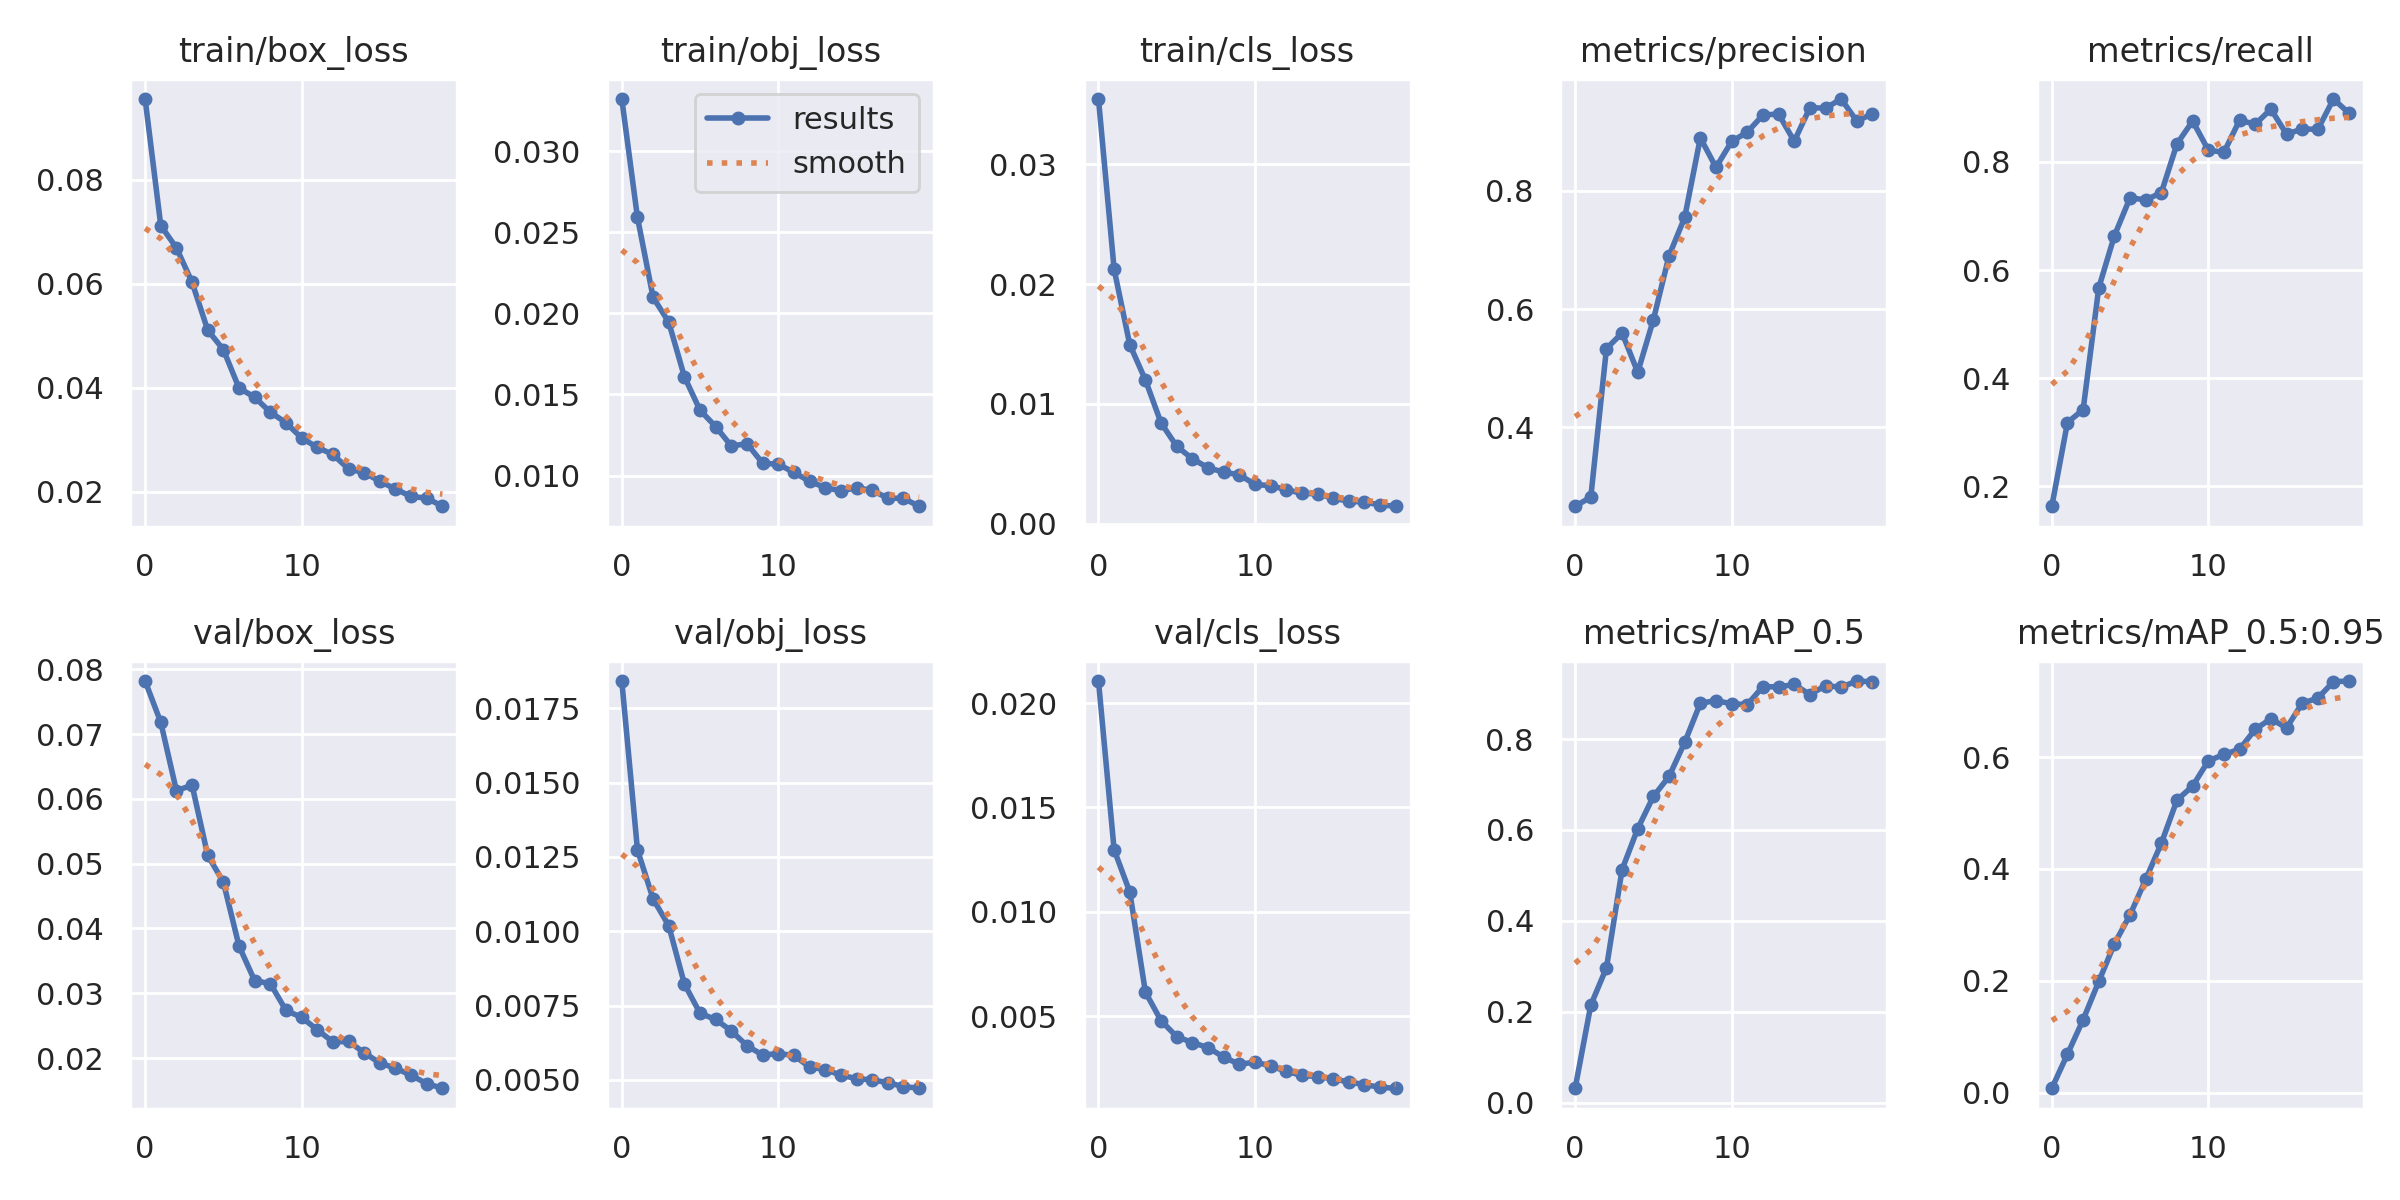

In [ ]:
# prompt: display the predicted image

Image.open(os.path.join(exp_path, 'results.png'))


# Predictions

In [ ]:
exp_path2 = '/content/yolov5/runs/detect/exp2'

In [ ]:
image_path = '/content/images/road213.png'
best_weights_path = os.path.join(exp_path, 'weights', 'best.pt')
!python detect.py --weights {best_weights_path} --conf 0.5 --source {images_path}

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content//images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-306-gb599ae42 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/877 /content/images/road0.png: 640x448 (no detections), 47.2ms
image 2/877 /content/images/road1.png: 480x640 1 trafficlight, 49.0ms
image 3/877 /content/images/road10.png: 448x640 1 trafficlight, 49.3ms
image 4/877 /content/images/road100.png: 640x640 (no detections), 11.7ms
image 5/877 /content/images/road

In [ ]:
exp_path3 = '/content/yolov5/runs/detect/exp3'

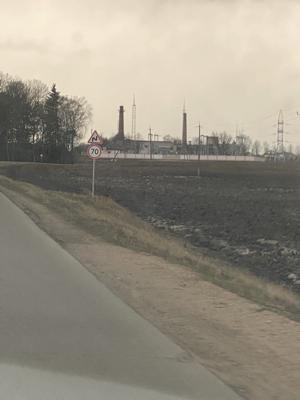

In [ ]:

image_dir = '/content/images'

Image(filename=os.path.join(image_dir, 'road213.png'))

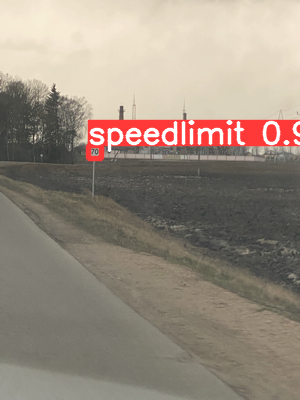

In [ ]:

from IPython.display import Image

# Display the image
Image(filename=os.path.join(exp_path3, 'road213.png'))


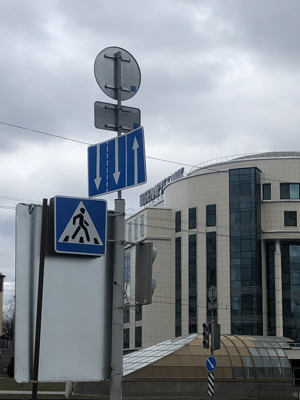

In [ ]:

image_dir = '/content/images'

Image(filename=os.path.join(image_dir, 'road200.png'))

In [ ]:
image_path = '/content/images/road200.png'
best_weights_path = os.path.join(exp_path, 'weights', 'best.pt')
!python detect.py --weights {best_weights_path} --conf 0.5 --source {images_path}

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content//images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-306-gb599ae42 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/877 /content/images/road0.png: 640x448 (no detections), 50.0ms
image 2/877 /content/images/road1.png: 480x640 1 trafficlight, 48.3ms
image 3/877 /content/images/road10.png: 448x640 1 trafficlight, 49.8ms
image 4/877 /content/images/road100.png: 640x640 (no detections), 11.6ms
image 5/877 /content/images/road

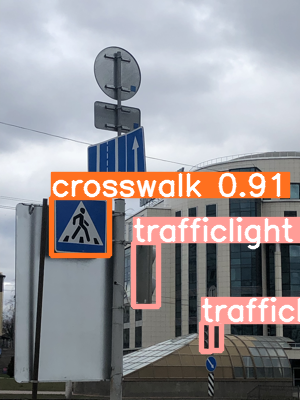

In [ ]:
exp_path4 = '/content/yolov5/runs/detect/exp4'
Image(filename=os.path.join(exp_path3, 'road200.png'))

In [ ]:
!pip install pillow